# Import the Necessary Libraries and Data

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns

In [270]:
training_labels = pd.read_csv('Data/training_set_labels.csv', index_col='respondent_id')
training_features = pd.read_csv('Data/training_set_features.csv', index_col='respondent_id')

# Explore the Data

In [271]:
training_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


In [272]:
training_labels.h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [273]:
training_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [274]:
data_df = pd.concat([training_features, training_labels], axis=1)

In [275]:
data_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [276]:
data_df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

# Clean the Data

## Remove Unnecessary Columns

In [277]:
h1n1_df = data_df.drop(['health_insurance',
                              'opinion_seas_vacc_effective',
                              'opinion_seas_risk',
                              'opinion_seas_sick_from_vacc',
                              'doctor_recc_seasonal',
                              'employment_industry',
                              'employment_occupation',
                              'seasonal_vaccine'], axis=1)
h1n1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  chronic_med_condition        25736 non-null  float64
 11  child_under_6_months         25887 non-null  float64
 12  health_worker                25903 non-null  float64
 13  opinion_h1n1_vac

## Dealing with Missing Data

In [278]:
print('Missing Data: \n',h1n1_df.isna().sum())

Missing Data: 
 h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status              1463
hhs_geo_region                    0
census_msa                        0
household_adults                249
household_ch

In [279]:
print('5% of data:', round(26707*.05, 2))
print('10% of data:', round(26707*.1, 2))
print('30% of data:', round(26707*.3, 2))

5% of data: 1335.35
10% of data: 2670.7
30% of data: 8012.1


Create a new category "unknown" for the columns with 1000+ missing entries.
Drop rows if the column is missing less than 1000 entries.
Columns to adjust: doctor_recc_h1n1, education, income_poverty, marital_status, rent_or_own, employment_status.

In [280]:
need_new_category = ['doctor_recc_h1n1', 
                     'education', 
                     'income_poverty', 
                     'marital_status', 
                     'rent_or_own', 
                     'employment_status']
for column in need_new_category:
    h1n1_df[column].fillna(value='unknown', inplace=True)

In [281]:
h1n1_df.isna().sum()

h1n1_concern                    92
h1n1_knowledge                 116
behavioral_antiviral_meds       71
behavioral_avoidance           208
behavioral_face_mask            19
behavioral_wash_hands           42
behavioral_large_gatherings     87
behavioral_outside_home         82
behavioral_touch_face          128
doctor_recc_h1n1                 0
chronic_med_condition          971
child_under_6_months           820
health_worker                  804
opinion_h1n1_vacc_effective    391
opinion_h1n1_risk              388
opinion_h1n1_sick_from_vacc    395
age_group                        0
education                        0
race                             0
sex                              0
income_poverty                   0
marital_status                   0
rent_or_own                      0
employment_status                0
hhs_geo_region                   0
census_msa                       0
household_adults               249
household_children             249
h1n1_vaccine        

In [282]:
h1n1_df.dropna(inplace=True)
h1n1_df.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
h1n1_vaccine                   0
dtype: int64

In [283]:
h1n1_features = h1n1_df.drop('h1n1_vaccine', axis=1)
h1n1_labels = h1n1_df['h1n1_vaccine']

In [284]:
h1n1_features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,unknown,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0


In [285]:
h1n1_labels.head()

respondent_id
0    0
1    0
2    0
3    0
4    0
Name: h1n1_vaccine, dtype: int64

## Encoding Categorical Columns

In [286]:
h1n1_features['doctor_recc_h1n1'].value_counts()

0.0        17890
1.0         5110
unknown     1828
Name: doctor_recc_h1n1, dtype: int64

In [287]:
h1n1_features['doctor_recc_h1n1'].replace(to_replace=0.0, value='No', inplace=True)
h1n1_features['doctor_recc_h1n1'].replace(to_replace=1.0, value='Yes', inplace=True)

In [288]:
h1n1_final = pd.get_dummies(h1n1_features)

In [289]:
h1n1_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24828 entries, 0 to 26706
Data columns (total 63 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   h1n1_concern                              24828 non-null  float64
 1   h1n1_knowledge                            24828 non-null  float64
 2   behavioral_antiviral_meds                 24828 non-null  float64
 3   behavioral_avoidance                      24828 non-null  float64
 4   behavioral_face_mask                      24828 non-null  float64
 5   behavioral_wash_hands                     24828 non-null  float64
 6   behavioral_large_gatherings               24828 non-null  float64
 7   behavioral_outside_home                   24828 non-null  float64
 8   behavioral_touch_face                     24828 non-null  float64
 9   chronic_med_condition                     24828 non-null  float64
 10  child_under_6_months              

We will have to rename some of these columns so they are usable in later code (for XG Boost).

In [292]:
h1n1_final.rename(columns = {'age_group_18 - 34 Years' : 'age_group_18_34',
                            'age_group_35 - 44 Years' : 'age_group_35_44',
                            'age_group_45 - 54 Years' : 'age_group_45_54',
                            'age_group_55 - 64 Years' : 'age_group_55_64',
                            'age_group_65+ Years' : 'age_group_over_65',
                            'education_12 Years' : 'education_12_years',
                            'education_< 12 Years' : 'education_less_than_12',
                            'education_College Graduate' : 'education_college_grad',
                            'education_Some College': 'education_some_college',
                            'race_Other or Multiple' : 'race_other',
                            'income_poverty_<= $75,000, Above Poverty' : 'income_poverty_lessorequal_75k',
                            'income_poverty_> $75,000' : 'income_poverty_morethan_75k',
                            'income_poverty_Below Poverty' : 'income_poverty_below_poverty',
                            'marital_status_Not Married': 'marital_status_Unmarried',
                            'employment_status_Not in Labor Force' : 'employment_status_not_in_labor_force',
                            'census_msa_MSA, Not Principle  City' : 'census_msa_not_in_principle',
                            'census_msa_MSA, Principle City' : 'census_msa_in_principle',
                            'census_msa_Non-MSA' : 'census_msa_non_msa'},
                 inplace=True)

In [293]:
h1n1_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24828 entries, 0 to 26706
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   h1n1_concern                          24828 non-null  float64
 1   h1n1_knowledge                        24828 non-null  float64
 2   behavioral_antiviral_meds             24828 non-null  float64
 3   behavioral_avoidance                  24828 non-null  float64
 4   behavioral_face_mask                  24828 non-null  float64
 5   behavioral_wash_hands                 24828 non-null  float64
 6   behavioral_large_gatherings           24828 non-null  float64
 7   behavioral_outside_home               24828 non-null  float64
 8   behavioral_touch_face                 24828 non-null  float64
 9   chronic_med_condition                 24828 non-null  float64
 10  child_under_6_months                  24828 non-null  float64
 11  health_worker  

## Splitting the Data and Fixing the Class Imbalance

In [294]:
X_train, X_test, y_train, y_test = train_test_split(h1n1_final, 
                                                    h1n1_labels, 
                                                    test_size=.25, 
                                                    random_state=42)

In [295]:
y_train.value_counts()

0    14615
1     4006
Name: h1n1_vaccine, dtype: int64

In [314]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

In [315]:
y_train_resampled.value_counts()

1    14615
0    14615
Name: h1n1_vaccine, dtype: int64

Now that our data is cleaned, we can begin creating models.

# Creating Models

## Baseline Model

In [322]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [323]:
print('Baseline Decision Tree Scores: \n', classification_report(y_test, clf.predict(X_test)))

Baseline Decision Tree Scores: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      4898
           1       0.42      0.46      0.44      1309

    accuracy                           0.75      6207
   macro avg       0.64      0.65      0.64      6207
weighted avg       0.76      0.75      0.76      6207



This model is fairly good at predicting a negative outcome, but less reliable for predicting a positive outcome.  Our next step will be to use a Grid Search to find the best parameters for this first model to see if that impacts our results.

In [324]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth' : [1, 2, 5, 10],
             'min_samples_split' : [2, 3, 10, 20]}

gs_tree = GridSearchCV(clf, param_grid, cv=3)
gs_tree.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10],
                         'min_samples_split': [2, 3, 10, 20]})

In [325]:
gs_tree.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3}

Since one of our best parameters, max depth, is the highest value from our grid search, we will try another one to make sure that value is the one we actually want to use.

In [328]:
param_grid_2 = {'criterion' : ['entropy'],
               'max_depth' : [10, 15, 20],
               'min_samples_split' : [3]}

gs_tree_2 = GridSearchCV(clf, param_grid_2, cv=3)
gs_tree_2.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15, 20],
                         'min_samples_split': [3]})

In [329]:
gs_tree_2.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3}

We will use these best parameters to create a new model.

In [330]:
clf_2 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3, random_state=42)
clf_2.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       random_state=42)

In [331]:
print("Second Decision Tree Scores: \n", classification_report(y_test, clf_2.predict(X_test)))

Second Decision Tree Scores: 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4898
           1       0.55      0.59      0.57      1309

    accuracy                           0.81      6207
   macro avg       0.72      0.73      0.73      6207
weighted avg       0.82      0.81      0.82      6207



This second model has improved our results, but not as drastically as we would like. The next classifier we will try in order to create a more accurate model will be Random Forests.

## Random Forests Model

In [332]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [333]:
print('Default Forest Model Scores: \n', classification_report(y_test, forest.predict(X_test)))

Default Forest Model Scores: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4898
           1       0.64      0.48      0.55      1309

    accuracy                           0.83      6207
   macro avg       0.76      0.71      0.72      6207
weighted avg       0.82      0.83      0.83      6207



This model is already performing better than our tuned Decision Tree.  Lets use Grid Search to take it a step further.

In [334]:
forest_param_grid = {'n_estimators' : [50, 100, 150],
                    'criterion' : ['gini', 'entropy'],
                    'max_depth' : [2, 5, 10, 20],
                    'min_samples_split' : [2, 5, 10, 20]}

forest_gs = GridSearchCV(forest, forest_param_grid, cv=3)
forest_gs.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [50, 100, 150]})

In [335]:
forest_gs.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 2,
 'n_estimators': 150}

In [336]:
forest_param_grid_2 = {'n_estimators' : [150, 200, 250],
                      'criterion' : ['gini'],
                      'max_depth' : [20, 30, 40],
                      'min_samples_split' : [2]}

forest_gs_2 = GridSearchCV(forest, forest_param_grid_2, cv=3)
forest_gs_2.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [20, 30, 40],
                         'min_samples_split': [2],
                         'n_estimators': [150, 200, 250]})

In [337]:
forest_gs_2.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'min_samples_split': 2,
 'n_estimators': 200}

In [338]:
forest_2 = RandomForestClassifier(n_estimators = 200, criterion='gini', max_depth=40, min_samples_split=2)
forest_2.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=40, n_estimators=200)

In [339]:
print('Second Forest Scores: \n', classification_report(y_test, forest_2.predict(X_test)))

Second Forest Scores: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4898
           1       0.64      0.47      0.54      1309

    accuracy                           0.83      6207
   macro avg       0.75      0.70      0.72      6207
weighted avg       0.82      0.83      0.82      6207



Tuning this model does not seem to have much impact on our results.  Our next step will be fitting an XG Boost model.

In [380]:
def plot_feature_importance(model):
    sns.set_style('darkgrid')
    importances = model.feature_importances_
    sorted_indices = np.argsort(importances)[::-1]
    n_features = 10
    plt.figure(figsize=(8,8))
    plt.barh(range(10), importances[sorted_indices][:10], align = 'center')
    plt.yticks(range(n_features), X_train_resampled.columns[sorted_indices][:10])
    plt.xlabel('Feature Importance', fontsize=16)
    plt.ylabel('Feature', fontsize=16)
    plt.title('Model Feature Importances', fontsize=20)

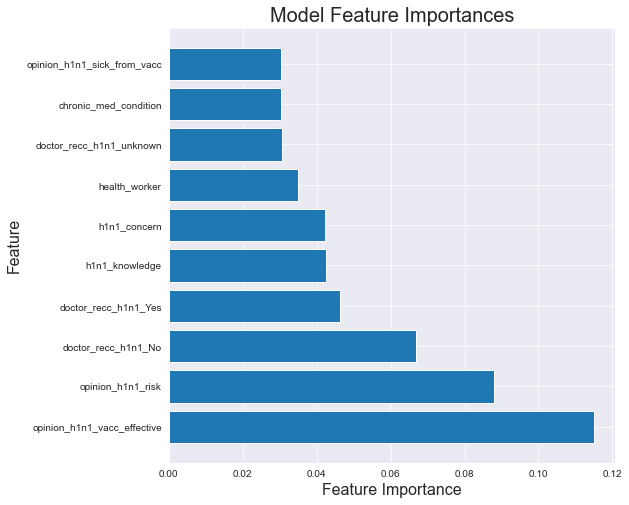

In [381]:
plot_feature_importance(forest_2)

## XG Boost Model

In [344]:
boost = XGBClassifier(random_state=42)
boost.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [345]:
print('XG Boost Model Scores: \n', classification_report(y_test, boost.predict(X_test)))

XG Boost Model Scores: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4898
           1       0.63      0.48      0.54      1309

    accuracy                           0.83      6207
   macro avg       0.75      0.70      0.72      6207
weighted avg       0.82      0.83      0.82      6207



This model performs just as well as our tuned random forests model.  Lets see if we can improve the performance by tuning the model.

In [346]:
boost_param_grid = {'learning_rate' : [.1, .2, .3],
                   'max_depth' : [4, 5, 6],
                   'min_child_weight' : [.5, .7, 1],
                   'n_estimators' : [100, 150, 200]}

gs_boost = GridSearchCV(boost, boost_param_grid, cv=3)
gs_boost.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=42,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
        

In [347]:
gs_boost.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 0.5,
 'n_estimators': 100}

In [349]:
boost_2 = XGBClassifier(random_state=42, 
                            learning_rate=.1, 
                            max_depth = 4, 
                            min_child_weight = .5, 
                            n_estimators = 100)
boost_2.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=0.5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [350]:
print('Second Boost Model Scores: \n', classification_report(y_test, boost_2.predict(X_test)))

Second Boost Model Scores: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4898
           1       0.63      0.51      0.56      1309

    accuracy                           0.83      6207
   macro avg       0.75      0.72      0.73      6207
weighted avg       0.82      0.83      0.83      6207



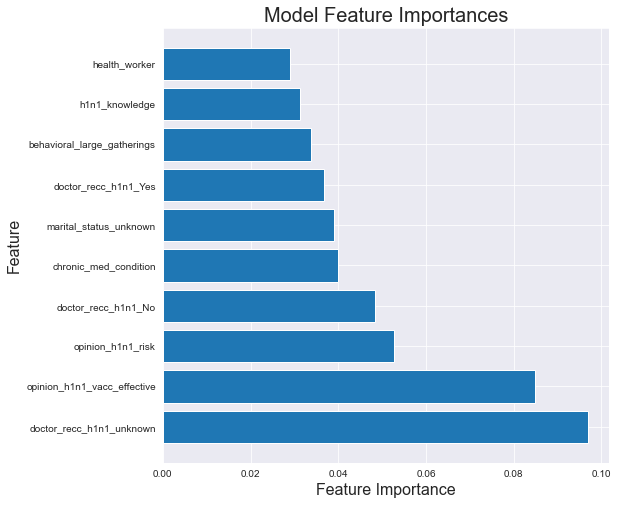

In [382]:
plot_feature_importance(boost_2)